In [28]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [318]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_prueba=x_test
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2595 - accuracy: 0.9237
Epoch 2/4
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1061 - accuracy: 0.9670
Epoch 3/4
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0736 - accuracy: 0.9767
Epoch 4/4
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0538 - accuracy: 0.9830


In [30]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.09619282063543796
0.971


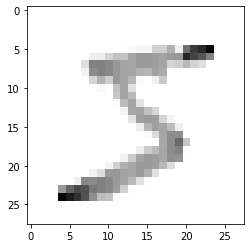

In [319]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [320]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [321]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [322]:
predictions = new_model.predict(x_test)

In [323]:
import numpy as np

print(np.argmax(predictions[9999]))
print(predictions[9999])

6
[1.5033887e-09 5.5609370e-08 1.0072664e-08 2.5417308e-09 3.0578653e-07
 2.8181152e-05 9.9997139e-01 1.2843544e-10 1.5158543e-08 3.5694245e-10]


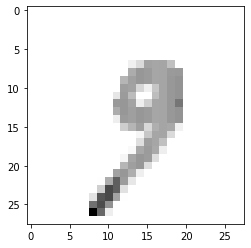

In [324]:
plt.imshow(x_test[1000],cmap=plt.cm.binary)
plt.show()

In [23]:
#from skimage import io
#from skimage import io,color
#image=io.imread("patrones2.png")/255.0
#image2=color.rgb2gray(image)
#image=io.imread("patrones7.png")/255.0
#image5=color.rgb2gray(image)

In [71]:
#model.evaluate(x,y,bath)

In [325]:
import numpy
confusion=numpy.zeros((10,10))
tamaño=10000
i=10
while i<tamaño:
    a=y_test[i]
    c=(np.argmax(predictions[i]))
    confusion[a,c]=int(confusion[a,c]+1)
    i=i+1
#print(confusion)
f=0
while f<10:
    print(confusion[f,0],confusion[f,1],confusion[f,2],confusion[f,3],confusion[f,4],confusion[f,5],confusion[f,6],confusion[f,7],confusion[f,8],confusion[f,9])
    f=f+1

966.0 0.0 2.0 1.0 1.0 0.0 5.0 0.0 3.0 1.0
0.0 1121.0 2.0 1.0 0.0 0.0 3.0 1.0 5.0 0.0
3.0 1.0 1007.0 7.0 2.0 1.0 1.0 4.0 5.0 0.0
0.0 1.0 4.0 988.0 0.0 8.0 0.0 1.0 3.0 5.0
0.0 0.0 3.0 0.0 954.0 0.0 6.0 4.0 3.0 10.0
2.0 0.0 0.0 19.0 0.0 853.0 9.0 1.0 4.0 3.0
3.0 2.0 1.0 0.0 2.0 4.0 946.0 0.0 0.0 0.0
2.0 2.0 10.0 10.0 1.0 1.0 0.0 992.0 2.0 7.0
3.0 1.0 2.0 4.0 3.0 5.0 7.0 2.0 941.0 6.0
1.0 4.0 0.0 10.0 12.0 2.0 1.0 4.0 4.0 969.0


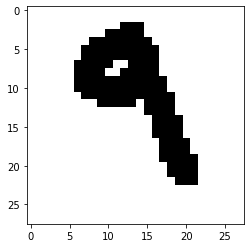

In [334]:
from skimage import io
from skimage import io,color
image=io.imread("patrones9.png")
image2=color.rgb2gray(image)
plt.imshow(image2,cmap=plt.cm.binary)
plt.show()

In [335]:

x_prueba[1]=image2
x_prueba = tf.keras.utils.normalize(x_prueba, axis=1)
prueba = new_model.predict(x_prueba)
print("el numero que se predijo es el: ")
print(np.argmax(prueba[1]))


el numero que se predijo es el: 
9


In [305]:
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test loss, test acc: [0.08923339357227086, 0.9727]
